N = 10: Средняя относительная частота = 0.522, Диапазон вероятностей = [0.100, 0.900]
N = 50: Средняя относительная частота = 0.490, Диапазон вероятностей = [0.340, 0.700]
N = 100: Средняя относительная частота = 0.494, Диапазон вероятностей = [0.370, 0.610]
N = 500: Средняя относительная частота = 0.501, Диапазон вероятностей = [0.440, 0.546]
N = 1000: Средняя относительная частота = 0.497, Диапазон вероятностей = [0.455, 0.544]
N = 5000: Средняя относительная частота = 0.500, Диапазон вероятностей = [0.481, 0.518]
N = 10000: Средняя относительная частота = 0.500, Диапазон вероятностей = [0.488, 0.510]
N = 100000: Средняя относительная частота = 0.500, Диапазон вероятностей = [0.496, 0.504]
N = 1000000: Средняя относительная частота = 0.500, Диапазон вероятностей = [0.499, 0.501]


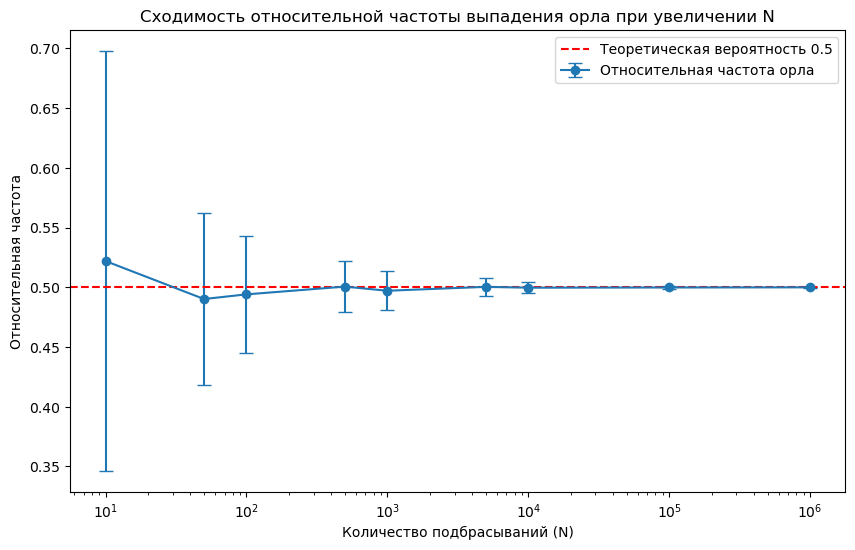

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Функция для симуляции подбрасывания монеты
def simulate_coin_tosses(n):
    # Генерируем n подбрасываний: 0 или 1 с вероятностью 0.5
    tosses = np.random.choice([0, 1], size=n)
    # Вычисляем относительную частоту выпадения орла (предположим, орёл соответствует 0)
    return np.mean(tosses == 0)

# Параметры эксперимента
N_values = [10, 50, 100, 500, 1000, 5000, 10000, 100000, 1000000]
repeats = 100  # число повторений для каждого N

# Списки для хранения результатов
mean_frequencies = []
std_frequencies = []
min_frequencies = []
max_frequencies = []

# Проведение эксперимента
for N in N_values:
    frequencies = [simulate_coin_tosses(N) for _ in range(repeats)]
    mean_frequencies.append(np.mean(frequencies))
    std_frequencies.append(np.std(frequencies))
    min_frequencies.append(np.min(frequencies))
    max_frequencies.append(np.max(frequencies))
    
    # Вывод результатов для текущего N
    print(f"N = {N}: Средняя относительная частота = {np.mean(frequencies):.3f}, "
          f"Диапазон вероятностей = [{np.min(frequencies):.3f}, {np.max(frequencies):.3f}]")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.errorbar(N_values, mean_frequencies, yerr=std_frequencies, fmt='o-', capsize=5, label='Относительная частота орла')
plt.axhline(0.5, color='red', linestyle='--', label='Теоретическая вероятность 0.5')
plt.xscale('log')
plt.xlabel('Количество подбрасываний (N)')
plt.ylabel('Относительная частота')
plt.title('Сходимость относительной частоты выпадения орла при увеличении N')
plt.legend()
plt.show()


Результаты эксперимента для разных типов кубиков:

4-гранный кубик (теоретическое М. ожидание = 2.500):
  n_rolls =      1: Empirical Mean = 1.000, Range = [1.000, 1.000]
  n_rolls =      2: Empirical Mean = 1.000, Range = [1.000, 1.000]
  n_rolls =      5: Empirical Mean = 2.800, Range = [1.000, 4.000]
  n_rolls =     10: Empirical Mean = 2.900, Range = [1.000, 4.000]
  n_rolls =     25: Empirical Mean = 2.760, Range = [1.000, 4.000]
  n_rolls =     50: Empirical Mean = 2.620, Range = [1.000, 4.000]
  n_rolls =    100: Empirical Mean = 2.550, Range = [1.000, 4.000]
  n_rolls =    500: Empirical Mean = 2.472, Range = [1.000, 4.000]
  n_rolls =   1000: Empirical Mean = 2.462, Range = [1.000, 4.000]
  n_rolls =   5000: Empirical Mean = 2.491, Range = [1.000, 4.000]
  n_rolls =  10000: Empirical Mean = 2.509, Range = [1.000, 4.000]

6-гранный кубик (теоретическое М. ожидание = 3.500):
  n_rolls =      1: Empirical Mean = 6.000, Range = [6.000, 6.000]
  n_rolls =      2: Empirical Mean = 5

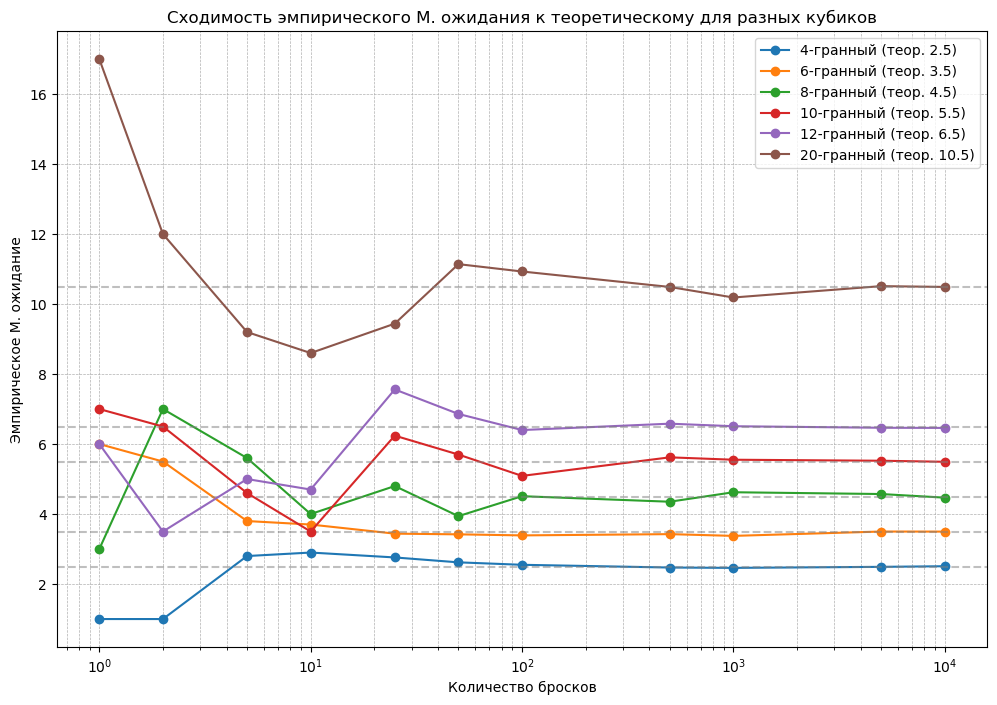

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Функция для симуляции бросков кубика
def simulate_die_rolls(n_rolls, sides):
    # Генерируем n_rolls выпадений чисел от 1 до sides (включительно)
    outcomes = np.random.randint(1, sides + 1, size=n_rolls)
    # Возвращаем: среднее значение (эмпирическое М. ожидание), минимальное и максимальное значение
    return np.mean(outcomes), np.min(outcomes), np.max(outcomes)

# Список типов кубиков: 4, 6, 8, 10, 12 и 20 граней
die_types = [4, 6, 8, 10, 12, 20]
# Заданный список количества бросков
n_rolls_values = [1, 2, 5, 10, 25, 50, 100, 500, 1000, 5000, 10000]

# Словарь для хранения результатов: для каждого кубика будем сохранять списки эмпирических М. ожиданий и диапазонов (min, max)
results = {}

print("Результаты эксперимента для разных типов кубиков:")
for sides in die_types:
    empirical_means = []   # для каждого количества бросков сохраняем среднее значение
    ranges = []            # для каждого количества бросков сохраняем диапазон результатов (min, max)
    theoretical_expectation = (sides + 1) / 2  # теоретическое М. ожидание для данного кубика
    print(f"\n{sides}-гранный кубик (теоретическое М. ожидание = {theoretical_expectation:.3f}):")
    for n in n_rolls_values:
        mean_outcome, min_outcome, max_outcome = simulate_die_rolls(n, sides)
        empirical_means.append(mean_outcome)
        ranges.append((min_outcome, max_outcome))
        print(f"  n_rolls = {n:6}: Empirical Mean = {mean_outcome:.3f}, Range = [{min_outcome:.3f}, {max_outcome:.3f}]")
    results[sides] = (empirical_means, ranges)

# Визуализация результатов: график эмпирического М. ожидания для каждого типа кубика
plt.figure(figsize=(12, 8))
for sides in die_types:
    theoretical_expectation = (sides + 1) / 2
    empirical_means, _ = results[sides]
    plt.plot(n_rolls_values, empirical_means, marker='o', label=f"{sides}-гранный (теор. {theoretical_expectation:.1f})")
    # Добавляем горизонтальную линию теоретического значения
    plt.axhline(theoretical_expectation, linestyle='--', color='gray', alpha=0.5)
plt.xscale('log')
plt.xlabel("Количество бросков")
plt.ylabel("Эмпирическое М. ожидание")
plt.title("Сходимость эмпирического М. ожидания к теоретическому для разных кубиков")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()
